In [2]:
#Imports
library(ggplot2)
library(reshape2)
library(Rmisc)
library(RColorBrewer)
library(viridis)
library(ggpubr)
library(repr)
library(dplyr)

Loading required package: lattice
Loading required package: plyr
Loading required package: viridisLite
Loading required package: magrittr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
# Define constants for reading the data
data_path <- "/home/anat/Research/ExAC/12.Figures/Global_precision_vs_prob/domains_prec_tables/"
ligands_comb_list <- c("dna", "rna", "ion", "peptide",  "sm")
folds_num <- "5"
model <- "XGB"
table_type <- "ens-MODEL"

In [5]:
#Reading the ligand data
ligand <- "ion"
filename <- paste0(ligand, "_",model, "_", table_type, ".csv")
data_table <- read.csv(paste0(data_path, filename), header = TRUE, sep = '\t', row.names = 1)
domain_filename <- paste0(ligand, "_domains_",model,"_", table_type,"_prob.csv")
domain_data_table <- read.csv(paste0(data_path, domain_filename), header = TRUE, sep = '\t', row.names = 1)

#Adding mean domain precision to the data table
domain_grouped_data <- domain_data_table %>% 
    group_by(prob) %>%
    summarise_all("mean")
data_table <- cbind(data_table, rev(domain_grouped_data$domain_precison))
data_table <- cbind(data_table, rev(domain_grouped_data$domain_recall))
colnames(data_table) <- c("frac_text", "positives", "Accuracy", "prob", "Coverage", "total", "Domain accuracy", "Domain recall")

#Change column order to effect lines drawing order
data_table <- data_table[,c(1,2,4,6,8,5,7,3)]



data_table_melted <- melt(data_table, id=c("prob", "positives", "total", "frac_text"))

Warning message in mean.default(domain):
“argument is not numeric or logical: returning NA”Warning message in mean.default(domain):
“argument is not numeric or logical: returning NA”Warning message in mean.default(domain):
“argument is not numeric or logical: returning NA”Warning message in mean.default(domain):
“argument is not numeric or logical: returning NA”Warning message in mean.default(domain):
“argument is not numeric or logical: returning NA”Warning message in mean.default(domain):
“argument is not numeric or logical: returning NA”Warning message in mean.default(domain):
“argument is not numeric or logical: returning NA”Warning message in mean.default(domain):
“argument is not numeric or logical: returning NA”Warning message in mean.default(domain):
“argument is not numeric or logical: returning NA”Warning message in mean.default(domain):
“argument is not numeric or logical: returning NA”Warning message in mean.default(domain):
“argument is not numeric or logical: returning NA

In [6]:
data_table

,frac_text,positives,prob,total,Domain recall,Coverage,Domain accuracy,Accuracy
0,9/9,9,0.990,9,0.2435606,0.02564103,1.00000000,1.00000000
1,53/54,53,0.900,54,0.5352994,0.15099715,1.00000000,0.98148148
2,73/76,73,0.800,76,0.5365152,0.20797721,1.00000000,0.96052632
3,93/101,93,0.700,101,0.6486291,0.26495726,0.94642857,0.92079208
4,99/109,99,0.600,109,0.6517759,0.28205128,0.94886364,0.90825688
5,112/130,112,0.500,130,0.6135530,0.31908832,0.88122605,0.86153846
6,125/153,125,0.400,153,0.6204750,0.35612536,0.91339869,0.81699346
7,134/176,134,0.300,176,0.6595482,0.38176638,0.90555556,0.76136364
8,153/206,153,0.200,206,0.6394681,0.43589744,0.87642276,0.74271845
9,182/281,182,0.100,281,0.6250997,0.51851852,0.79002695,0.64768683


In [78]:
data_table_melted

prob,positives,total,frac_text,variable,value
0.950,1,1,1/1,Domain coverage,0.250000000
0.800,16,19,16/19,Domain coverage,0.318733766
0.700,30,38,30/38,Domain coverage,0.350155574
0.600,42,61,42/61,Domain coverage,0.347005772
0.500,60,94,60/94,Domain coverage,0.308365470
0.400,80,140,80/140,Domain coverage,0.308103563
0.300,120,236,120/236,Domain coverage,0.344794144
0.200,168,393,168/393,Domain coverage,0.397511304
0.100,287,1616,287/1616,Domain coverage,0.467832487
0.050,423,8284,423/8284,Domain coverage,0.635654322


### Plot the legend

png 
  2

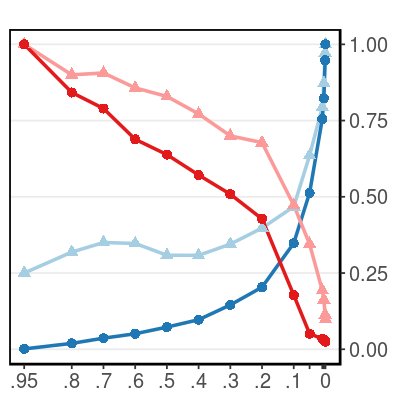

In [64]:
data_table_melted$variable <- factor(data_table_melted$variable, levels=c("Accuracy", "Coverage", "Domain accuracy", "Domain recall"), labels=c("Accuracy", "Coverage", "Domain\naccuracy", "Domain\ncoverage"))
options(repr.plot.width=3.5, repr.plot.height=3.5)

fig <- ggplot(data_table_melted, aes(x=prob, y=value, color=variable)) +
    geom_line(aes(linetype=variable), size=1) + 
    geom_point(aes(shape=variable), size=2.5) +
    #scale_x_reverse(breaks = c(0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0), labels = c(0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, ".05", "", "", "", "0")) +
    #scale_x_reverse(breaks = c(0.1, 0.075, 0.05, 0.025, 0.01, 0.005, 0.001, 0), labels = c(".1", ".075", ".05", ".025", ".01", "", "", "0")) + #RNA
    #scale_x_reverse(breaks = c(0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0), labels = c(0.5, 0.4, 0.3, 0.2, 0.1, ".05", "", "", "", "0")) +
    #scale_x_reverse(breaks = c(0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0), labels = c(".99", ".9", ".8", ".7", ".6", ".5", ".4", ".3", ".2", ".1", "", "", "", "", "0")) + #ion
    #scale_x_reverse(breaks = c(0.98, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0), labels = c(".98", ".9", ".8", ".7", ".6", ".5", ".4", ".3", ".2", ".1", "", "", "", "", "0")) + #dna
    scale_x_reverse(breaks = c(0.95, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0), labels = c(".95", ".8", ".7", ".6", ".5", ".4", ".3", ".2", ".1", "", "", "", "", "0")) + #sm
    #scale_x_reverse(breaks = c(0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0), labels = c(".8", ".7", ".6", ".5", ".4", ".3", ".2", ".1", "", "", "", "", "0")) + #peptide
    scale_y_continuous(position = "right") +
    coord_cartesian(xlim=c(0.95,0), ylim=c(0,1)) +
    scale_color_manual(values = c("#a6cee3", "#1f78b4", "#fb9a99", "#e31a1c")) +
    scale_linetype_manual(values = c("solid", "solid", "solid",  "solid")) +
    scale_shape_manual(values = c(17, 16, 17, 16)) +
    xlab("") +
    ylab("") +
    ggtitle("") +
    #geom_text(aes(label=(total),hjust=0, vjust=0)) +
    theme_bw() +
    theme(plot.title = element_text(hjust=0.5, size=8),
          axis.text.x = element_text(size=12, angle=0),
          axis.text.y = element_text(size=12),
          legend.text=element_text(size=6),
          legend.title=element_blank(),
          panel.grid.minor = element_blank(),
          panel.grid.major.x = element_blank(),
          panel.border = element_rect(color="black",size = 1),
          legend.position="None")

svg(paste0("plots/",ligand,"_",model,"_",table_type,"_acc_cov.svg"), width=4, height=4.2)
fig
dev.off()
fig

png 
  2

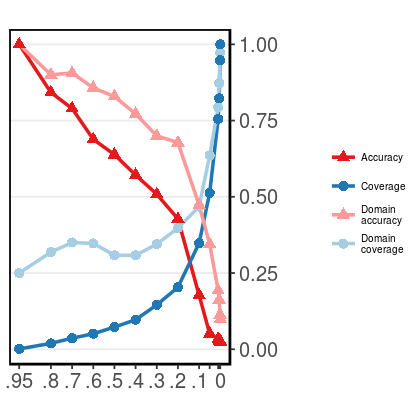

In [81]:
#svg(filename=paste0("plots/",ligand,"_",model,"_",table_type,"_acc_cov.svg"), width = 4, height = 4.2)
options(repr.plot.width=3.5, repr.plot.height=3.5)

fig <- ggplot(data_table_melted, aes(x=prob, y=value, color=variable)) +
    geom_line(aes(linetype=variable), size=1) + 
    geom_point(aes(shape=variable), size=2.5) +
    #scale_x_reverse(breaks = c(0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0), labels = c(0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, ".05", "", "", "", "0")) +
    #scale_x_reverse(breaks = c(0.1, 0.075, 0.05, 0.025, 0.01, 0.005, 0.001, 0), labels = c(".1", ".075", ".05", ".025", ".01", "", "", "0")) + #RNA
    #scale_x_reverse(breaks = c(0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0), labels = c(0.5, 0.4, 0.3, 0.2, 0.1, ".05", "", "", "", "0")) +
    #scale_x_reverse(breaks = c(0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0), labels = c(".99", ".9", ".8", ".7", ".6", ".5", ".4", ".3", ".2", ".1", "", "", "", "", "0")) + #ion
    #scale_x_reverse(breaks = c(0.98, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0), labels = c(".98", ".9", ".8", ".7", ".6", ".5", ".4", ".3", ".2", ".1", "", "", "", "", "0")) + #dna
    scale_x_reverse(breaks = c(0.95, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0), labels = c(".95", ".8", ".7", ".6", ".5", ".4", ".3", ".2", ".1", "", "", "", "", "0")) + #sm
    #scale_x_reverse(breaks = c(0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005, 0.001, 0), labels = c(".8", ".7", ".6", ".5", ".4", ".3", ".2", ".1", "", "", "", "", "0")) + #peptide
    scale_y_continuous(position = "right") +
    coord_cartesian(xlim=c(0.95,0), ylim=c(0,1)) +
    scale_color_manual(values = c("#e31a1c", "#1f78b4", "#fb9a99", "#a6cee3")) +
    scale_linetype_manual(values = c("solid", "solid", "solid",  "solid")) +
    scale_shape_manual(values = c(17, 16, 17, 16)) +
    xlab("") +
    ylab("") +
    ggtitle("") +
    
    #geom_text(aes(label=(total),hjust=0, vjust=0)) +
    theme_bw() +
    theme(plot.title = element_text(hjust=0.5, size=8),
          axis.text.x = element_text(size=12, angle=0),
          axis.text.y = element_text(size=12),
          legend.text=element_text(size=6),
          legend.title=element_blank(),
          panel.grid.minor = element_blank(),
          panel.grid.major.x = element_blank(),
          panel.border = element_rect(color="black",size = 1),
          legend.position="right") +

svg(paste0("plots/legend_acc_cov.svg"), width=4, height=4.2)
fig
dev.off()
fig